# Decision Trees and Random Forests
In this exercise we will take a look at a very popular algorithm. It is a non-parametric algorithm called random forests. Random forests are an example of an ensemble method, meaning that it relies on aggregating the results of an ensemble of simpler estimators. That is, it uses the majority vote among a number of estimators this usually yields better results than any of the individual estimators doing the voting.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 

## Decision Trees
As stated before, Random forests are an example of an ensemble learner built on top of decision trees. So first we will explain decision trees themselves.

Decision trees are very intuitive ways to classify or label objects: you simply ask a series of questions designed to advance on the classification. For example, if you wanted to build a decision tree to classify an animal you come across while on a hike, you might construct the one shown here:

<img src="decision-tree.png">

In a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes. The trick, of course, comes in deciding which questions to ask at each step. In machine learning, generally each node in the tree splits the data into two groups using a cutoff value within one of the features. Let us start with an example.

First, start by generating some points with `make_blobs`. Generate 300 examples and 4 different blobs or centers. `random_state=0` and `cluster_std=1.0`. Then plot the results.

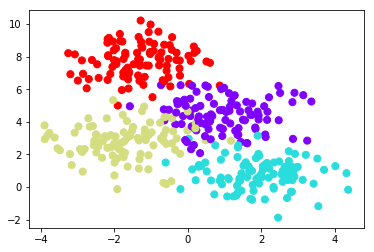

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it. This figure presents a visualization of the first four levels of a decision tree classifier for this data

<img src="decision-tree-process.png">


This process of fitting a decision tree to our data can be done in `Scikit-Learn` with the `DecisionTreeClassifier estimator`. Implement a Decision Tree and fit it to the dataset.

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

This function will receive a model fitted to the data and the data itself and plot the decision regions.

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow', figsize=(7,7)):
    if ax is None:
        plt.figure(figsize=figsize)
    
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Use the previous function to plot the results of the random forest, what can you observe? Do these decision boundaries make sense?

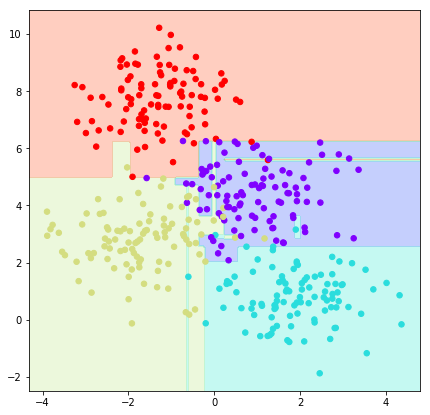

In [5]:
visualize_classifier(tree, X, y)

## Decision trees and overfitting
It is quite common for Decision Trees to overfit if we do not limit the complexity of the tree. Limiting the complexity of the tree has a similar effect as applying regularization. It will prevent overfitting and hopefully improve the generalization error. Now train other decision trees and vary the `max_depth` parameter. Try for example 1, 2, 10, 100, 1000. What is this parameter doing?

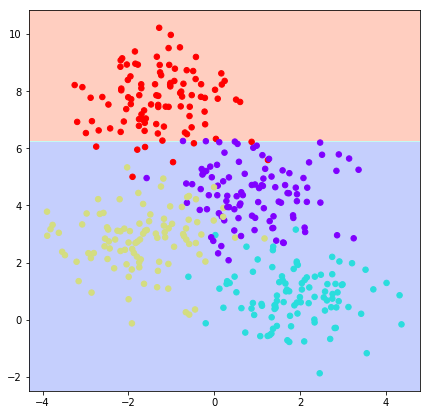

In [6]:
tree = DecisionTreeClassifier(max_depth=1, random_state=0)
tree.fit(X, y)

visualize_classifier(tree, X, y)

Now try a different parameter, for example `min_samples_split`. Again, try different values. What happens for small values, like 4? What happens with large values, like 300? What is the minimum and maximum value this parameter might have?

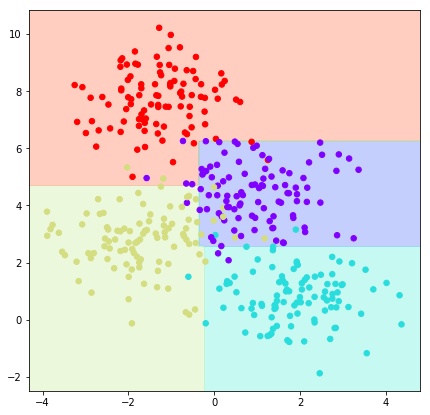

In [7]:
tree = DecisionTreeClassifier(min_samples_split=100, random_state=0)
tree.fit(X, y)

visualize_classifier(tree, X, y)

Finally, another important parameter for Decision Trees is `min_samples_leaf`. What is this parameter indicating? Try different parameters.

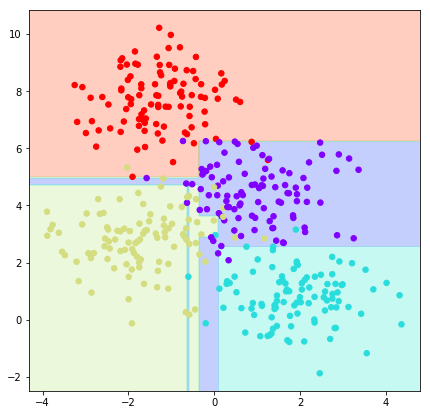

In [8]:
tree = DecisionTreeClassifier(min_samples_leaf=3, random_state=0)
tree.fit(X, y)

visualize_classifier(tree, X, y)

## Ensemble methods

A different way to reduce over-fittting and improve the generalization error is to train several trees with random subsamples of the training data. This way we will reduce the noise in the training examples by doing a majority vote. Train 3 different trees with the default parameters, using random subsamples of the dataset with 50% of the data and plot the results with the `subplot` function. You may use `train_test_split` to do the subsampling.

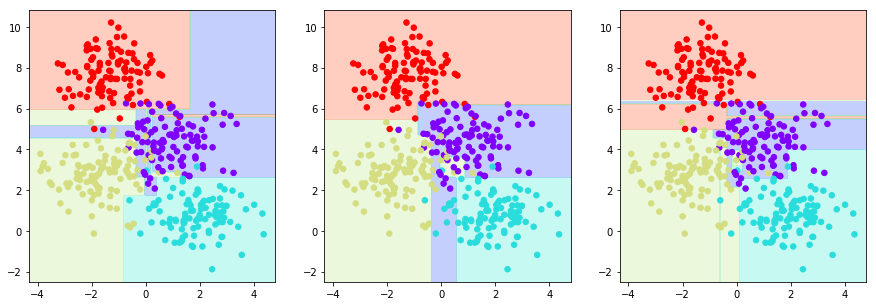

In [9]:
from sklearn.model_selection import train_test_split

plt.figure(figsize=(15, 5))
for i in range(3):
    X_train, _, y_train, _ = train_test_split(X, y, random_state=i, test_size=0.5)
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    ax = plt.subplot(1, 3, i + 1)
    visualize_classifier(tree, X, y, ax=ax)

What can you observe from the previous plots? Do they have some common regions? 

## Bagging

This notion that multiple overfitting estimators can be combined to reduce the effect of this overfitting is what underlies an ensemble method called bagging. *Bagging* makes use of an ensemble of "weak" estimators, each of which over-fits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a *random forest*. You can do that manually with sklearn `BaggingClassifier`. Use this method and apply it to a `DecisionTreeClassifier`. Generate a bag with 100 estimators, each trained with 50% of the data.

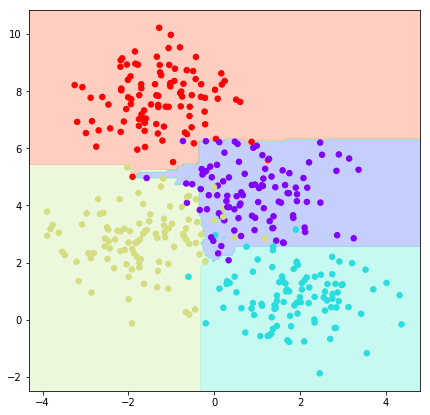

In [10]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.5,
                        random_state=0)

bag.fit(X, y)
visualize_classifier(bag, X, y)

In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen, instead of the number of examples. This way, all the data contributes to the fit each time, but the results of the fit still have the desired randomness. For example, when determining which feature to split on, the randomized tree might select from among the top several features. Scikit learn already has a method to train ensembles of decision trees, the `RandomForestClassifier`. Use it to train an Random Forest with the same specifications as the previous one.

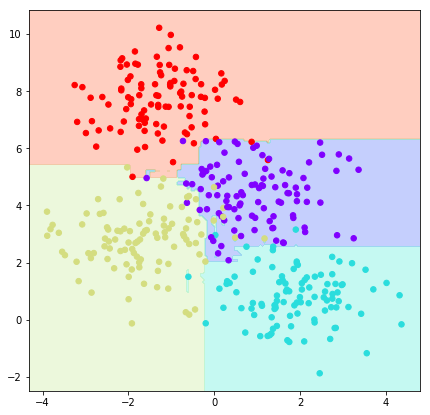

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X, y)
visualize_classifier(model, X, y)

## Regression with random forests

In the previous section we considered random forests within the context of classification. Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is the `RandomForestRegressor`. The following piece of code generates a dataset of points that oscilate with to periodicities. 

In [ ]:
np.random.seed(0)
x = 10 * np.random.rand(300)
sigma=0.2

def points(x, sigma=sigma):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = points(x)
plt.figure(figsize=(10,10))
plt.errorbar(x, y, yerr=sigma, fmt='o');

# transforming the data to include another axis (this is the format needed by sklearn)
x = x[:, np.newaxis]
y = y[:, np.newaxis]

What regression model would you use for this dataset? (Hint: You should try different degrees). Implement it with sklearn. Do you think it will work? Why?

After fitting the model, you should plot the results. Create a plot with the original points and the error in blue, a red line for the prediction and a black line for the true line. You may use `np.linspace(0, 10, 1000)` to create 1000 points between 0 and 10. That will be your x.

Did the model work? Why is that? What would be the degree of the polynomial needed to correctly fit a periodic function such as a sinus? Try now to fit the points with the RandomForestRegressor, use 200 trees and the default parameters. Then plot the results as before.

## Feature importance with Random forests

The way the random forests (Decision trees) are defined makes them very useful to extract the importance of each feature to eventually classify each data point. The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. Features used at the top of the tree contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features. In scikit-learn, the fraction of samples a feature contributes to is combined with the decrease in impurity from splitting them to create a normalized estimate of the predictive power of that feature.

We will now explore the importance of features with an image dataset, specifically the Olivetti Faces dataset. The code below loads the dataset from sklearn.

In [ ]:
from time import time

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

# Load the faces dataset
data = fetch_olivetti_faces()

Print the description of the dataset.

In order to visualize its content. Make a subplot with the first 25 images of the dataset, print the target variable in the title of each subplot. Plot the images in grayscale with function `plt.imshow` and remove the axis for a cleaner visualization.

Define your X and y. Use the `ExtraTreesClassifier` model to fit the data. First perform a train-test split with `test_size=0.3`. The model should have 1000 trees and should have `max_features=128`. As an experiment, you could measure the time spent in your training with the `time` library. Then change the parameter `njobs`, what values could you use for this parameter? What do you think it does? 

Now extract the feature importances from the model. Reshape them in order to have the shape of the images in the dataset. Finally plot the importance "heatmap" with `plt.imshow`, use `cmap='hot'`.

Finally, compute the accuracy score over the test set, implement it without sklearn.